# problem statement:- classify the quality of an apple

# importing all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import scipy.stats as ss
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report
from sklearn.compose import ColumnTransformer
import pickle

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder,FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

# Data Collection

In [2]:
# loading the dataset

data=pd.read_csv(r"C:\Users\khang\Elite 14 M-L\ML_Project\raw Data\apple_quality.csv")

In [3]:
# making a copy of the dataset

df=data.copy()

In [4]:
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


# Data Exploration

In [5]:
df.shape       

(4001, 9)

data has 4001 datapoints and 9 variables

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


there is a null values in the data
and need to convert the acidity column datatype as data is in numeric

In [7]:
# dropping a row having null values

df.drop(4000,axis=0,inplace=True) 

In [8]:
df["Acidity"]=df["Acidity"].astype(dtype=np.float64)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 281.4+ KB


In [10]:
df.drop("A_id",axis=1,inplace=True) # dropping the column as it is not necessary for EDA

In [11]:
df.duplicated().sum()

0

 data has no duplicate values

In [12]:
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [13]:
df["Quality"].value_counts()   # checking if the data is balanced or not 

good    2004
bad     1996
Name: Quality, dtype: int64

In [14]:
# the data is balanced 

In [15]:
df["Quality"]

0       good
1       good
2        bad
3       good
4       good
        ... 
3995     bad
3996    good
3997     bad
3998    good
3999    good
Name: Quality, Length: 4000, dtype: object

# EDA

In [16]:
df.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [17]:
# countplot for quality 

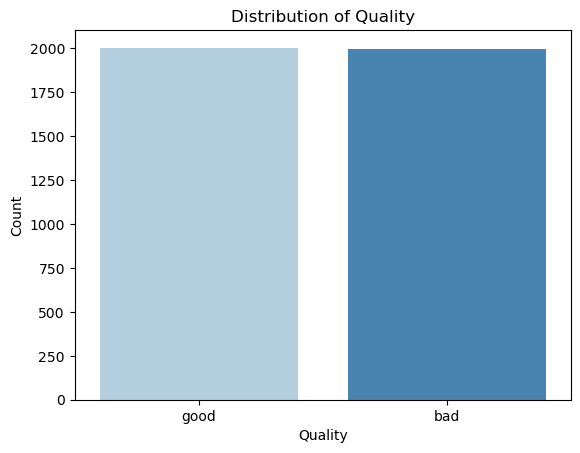

In [18]:
sns.countplot(x='Quality', data=df, palette='Blues')

plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Quality')

plt.show()

# pre - processing

In [19]:
# extracting feature variables and class variable

fv=df.iloc[:,0:-1] # feature varaible
cv=df.iloc[:,-1] # class variable

In [20]:
fv

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984
...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720


In [21]:
cv

0       good
1       good
2        bad
3       good
4       good
        ... 
3995     bad
3996    good
3997     bad
3998    good
3999    good
Name: Quality, Length: 4000, dtype: object

In [22]:
cv=cv.map({"good":1,"bad":0})

### EDA after Preprocessing

In [23]:
#Finding the correlation between all the variable in the dataset
fv.corr(method="pearson")

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669
Acidity,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000


<AxesSubplot:>

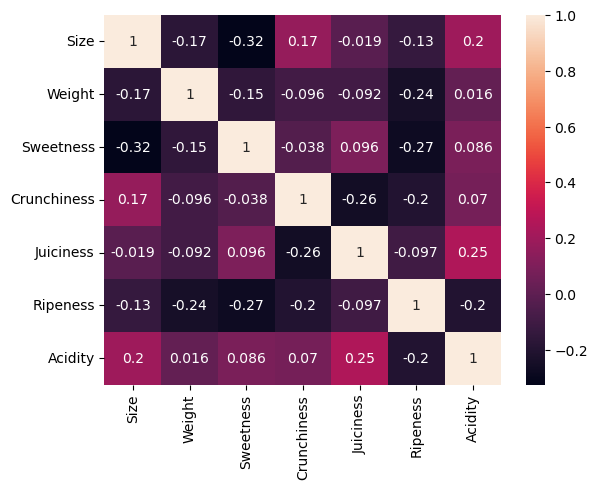

In [24]:
ax = sns.heatmap(fv.corr(), annot=True)
ax

In [25]:
# from the above heaatmap we can see that no two variables are highly correlated in either way

In [26]:
fv.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984


In [27]:
cv.head()

0    1
1    1
2    0
3    1
4    1
Name: Quality, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# dividing dataset into train and test

In [30]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=3,stratify=cv)

In [31]:
d_eda=pd.concat([x_train,y_train],axis=1)

In [32]:
d_eda["Quality"]=d_eda["Quality"].map({1:"good",0:"bad"})

In [33]:
d_eda

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
12,-0.170812,-1.867271,-1.771845,2.413155,-3.094555,-0.624884,-2.076114,bad
2763,-0.530637,-0.556666,1.057852,-0.442602,-1.852590,-1.650415,-0.733236,good
1463,1.046011,-3.744529,-4.502815,5.663943,1.673697,-1.039944,-0.607660,good
3648,-0.721063,-0.848216,-0.706661,0.802176,-0.381320,-0.545140,2.069510,bad
1831,-0.956354,0.990504,-2.189060,0.758420,-0.612463,0.660522,0.119976,bad
...,...,...,...,...,...,...,...,...
3928,-1.406268,-1.797016,-0.873765,1.163187,-0.207798,2.364105,0.408771,bad
997,2.789451,-0.350118,-4.032199,-0.075977,2.113071,0.115447,-1.454220,bad
2524,-1.112851,-0.152395,-0.009341,1.346305,1.854070,0.413477,-2.068532,good
3349,-3.300244,3.157961,-1.397066,-0.461591,2.198573,-1.238871,-3.580040,good


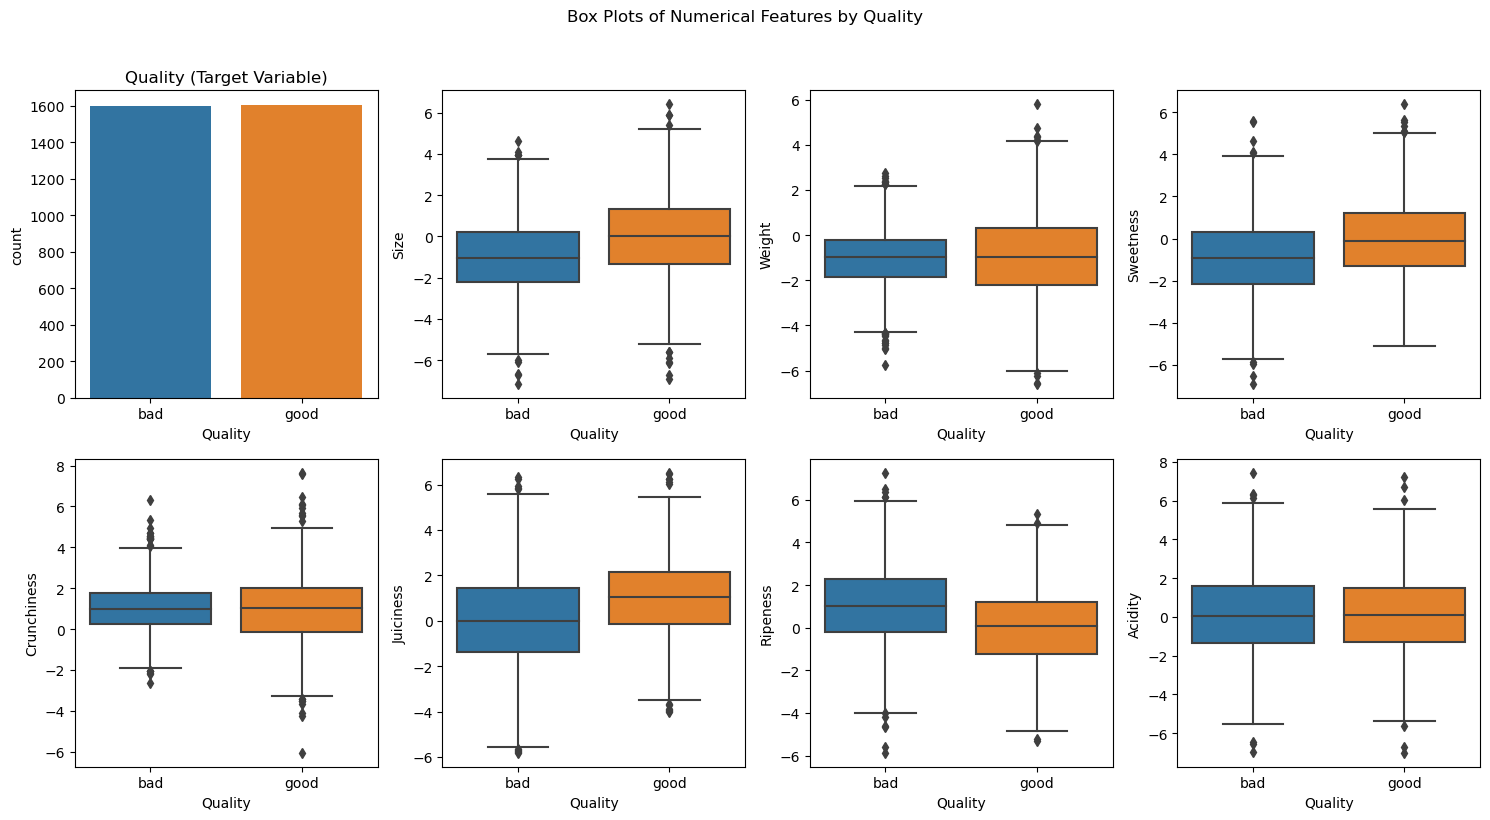

In [34]:

numeric_columns = d_eda.select_dtypes(include=['float64', 'int64']).columns

# Check the 'Quality' column separately
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

# Countplot for 'Quality' (categorical variable)
sns.countplot(x='Quality', data=d_eda, ax=axes[0, 0])
axes[0, 0].set_title('Quality (Target Variable)')

# Boxplots for numeric features
for i, col in enumerate(numeric_columns, start=1):
    sns.boxplot(x='Quality', y=col, data=d_eda, ax=axes[i // 4, i % 4])

plt.suptitle('Box Plots of Numerical Features by Quality', y=1.02)
plt.tight_layout()
plt.show()


Size


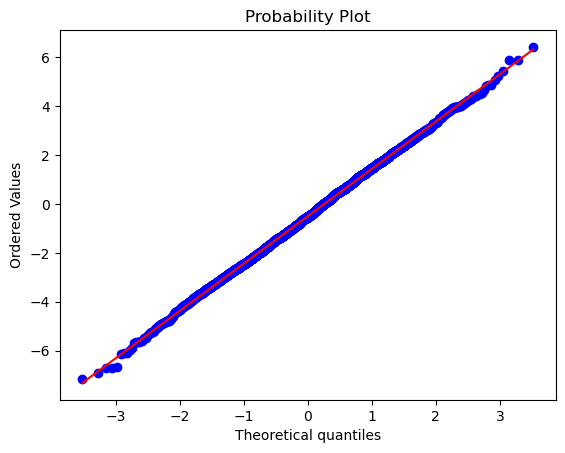

Weight


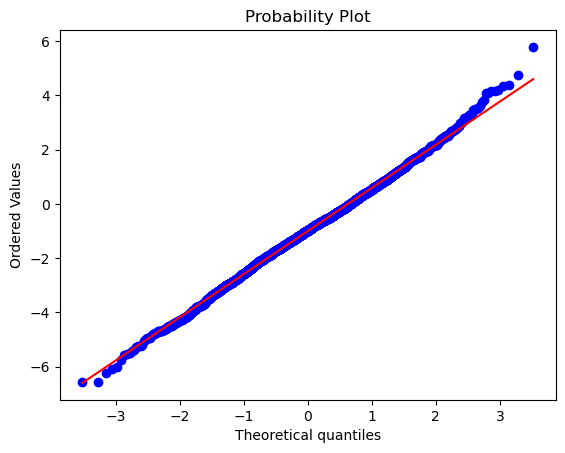

Sweetness


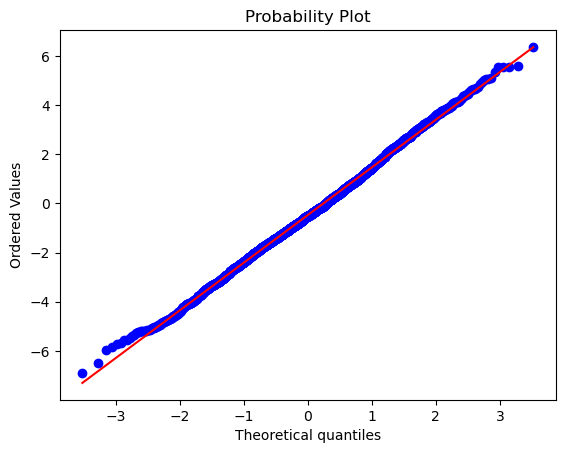

Crunchiness


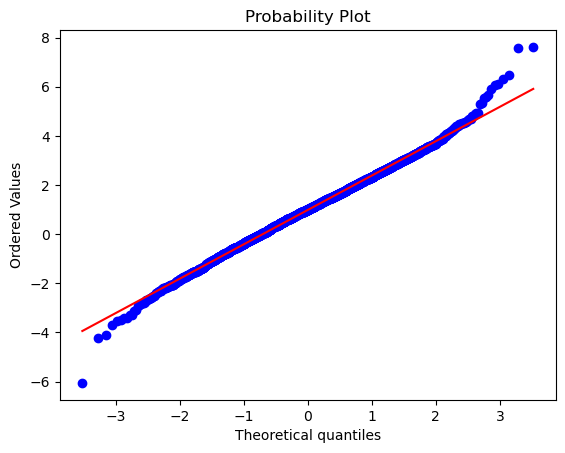

Juiciness


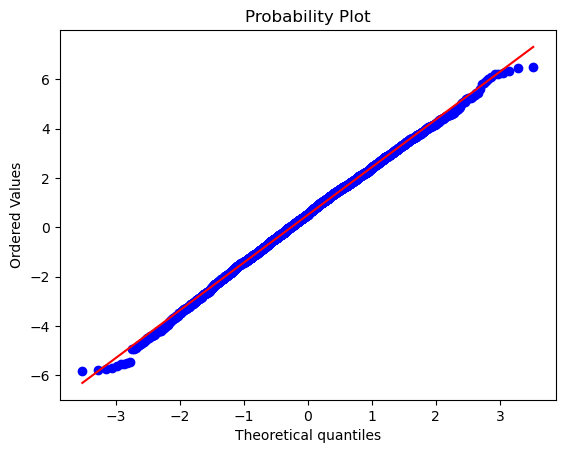

Ripeness


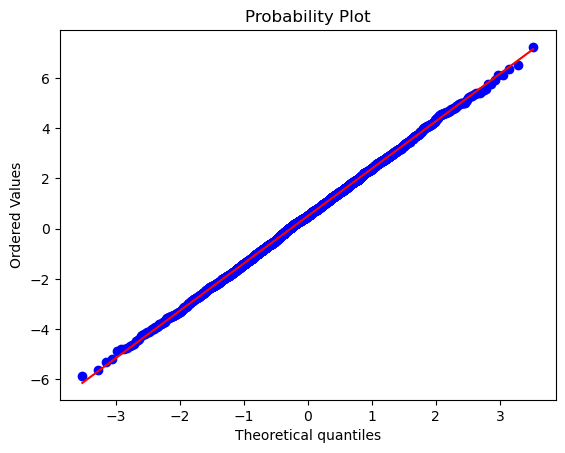

Acidity


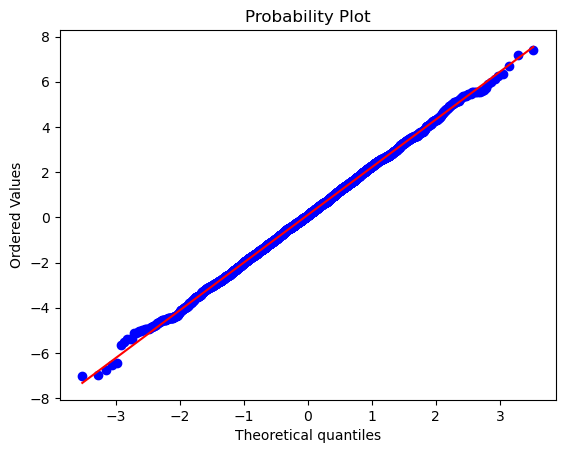

In [35]:
# checking if all the columns follow normal distribution



for y in x_train.columns:
    plt.subplot(111) # to create 1 row 1 column and 1 index
    ss.probplot(x_train[y],dist="norm",fit=True,plot=plt)
    print(y)
    plt.show()
    

In [36]:
# here the Q-Q plots is showing whether all the features are following gaussian distribution or not 


# Creating Pipeline

In [37]:
num_data=x_train.select_dtypes(include=["int64","float64"])

In [38]:
num_data

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
12,-0.170812,-1.867271,-1.771845,2.413155,-3.094555,-0.624884,-2.076114
2763,-0.530637,-0.556666,1.057852,-0.442602,-1.852590,-1.650415,-0.733236
1463,1.046011,-3.744529,-4.502815,5.663943,1.673697,-1.039944,-0.607660
3648,-0.721063,-0.848216,-0.706661,0.802176,-0.381320,-0.545140,2.069510
1831,-0.956354,0.990504,-2.189060,0.758420,-0.612463,0.660522,0.119976
...,...,...,...,...,...,...,...
3928,-1.406268,-1.797016,-0.873765,1.163187,-0.207798,2.364105,0.408771
997,2.789451,-0.350118,-4.032199,-0.075977,2.113071,0.115447,-1.454220
2524,-1.112851,-0.152395,-0.009341,1.346305,1.854070,0.413477,-2.068532
3349,-3.300244,3.157961,-1.397066,-0.461591,2.198573,-1.238871,-3.580040


In [39]:
# creating a pipeline for handling missing values which will be implemented by simple imputer class and strategy of imputing 
# is mean.and in the same pipeline used standard scalar for scaling
nup=Pipeline([("input_n",SimpleImputer()),("scaling",StandardScaler())])

In [40]:
# for transforming the columns columntransformer is used and inside pipeline is passed where we created to transform
col_tp=ColumnTransformer([("numerical",nup,num_data.columns)],remainder="passthrough")

In [41]:
col_tp

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical',
                                 Pipeline(steps=[('input_n', SimpleImputer()),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity'],
      dtype='object'))])

In [42]:
# importing gaussian naive bayes
from sklearn.naive_bayes import GaussianNB

In [43]:
gb=GaussianNB()

In [44]:
model=gb.fit(x_train,y_train)  # fitting the model based on training data

In [45]:
final_model=model.predict(x_test) # predicting class variable for x_test

In [46]:
final_model

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,

In [47]:
# importing accuracy_score to check the accuracy of the model

from sklearn.metrics import accuracy_score


In [48]:
accuracy_score(y_test,final_model)

0.75

In [49]:
print(classification_report(y_test,final_model))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       399
           1       0.74      0.78      0.76       401

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800



As the data is imbalanced data we need consider macro avg where it gives equal importance to both class labels.
the model is 75% confident that prediction is correct.

In [50]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [51]:
cm=confusion_matrix(y_test,final_model)

In [52]:
cm

array([[289, 110],
       [ 90, 311]], dtype=int64)

In [53]:
gb.classes_

array([0, 1], dtype=int64)

In [54]:
ConfusionMatrixDisplay(cm,display_labels=gb.classes_)

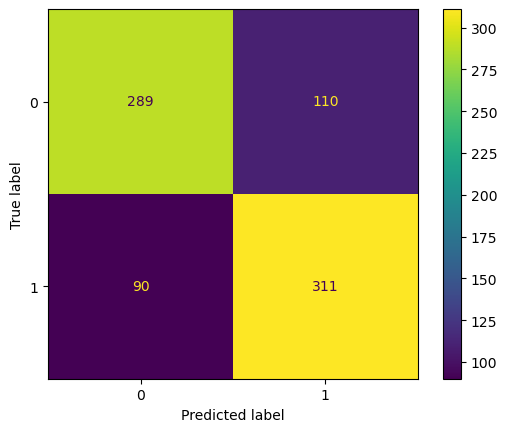

In [55]:
i=ConfusionMatrixDisplay(cm,display_labels=gb.classes_)
i.plot()
plt.show()

# deployment

In [56]:
# this is the pipeline for preprocessing that can be used in final model 
finalp=Pipeline([("preprocessed",col_tp)])

In [57]:
finalp

Pipeline(steps=[('preprocessed',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('input_n',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity'],
      dtype='object'))]))])

In [58]:
# final gaussian naive bayes model for numerical data where this can be used for any model 
model=gb.fit(finalp.fit_transform(x_train),y_train)

In [59]:
# dumping the model

In [63]:
import pickle
import os

In [64]:
os.makedirs(r"C:\Users\khang\Elite 14 M-L\ML_Project\Model's\pickle", exist_ok=True)
pickle.dump(finalp, open(r"C:\Users\khang\Elite 14 M-L\ML_Project\Model's\pickle\finalp_apple.pk1", "wb"))
pickle.dump(model, open(r"C:\Users\khang\Elite 14 M-L\ML_Project\Model's\pickle\model_apple.pk1", "wb"))
